<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/Estadistica_e_InferenciaCausal/2%20Inferencia%20Bayesiana/Notebooks/Inferencia_Bayesiana_Distribuciones_conjugadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd

import datetime
from scipy.special import factorial
from numpy import exp

from scipy.stats import poisson, gamma

import matplotlib.pyplot as plt

## Definición del problema:

Conocer el promedio diario de ciclistas que transitan por el puente de Brooklin, parámetro al que llamaremos ($\lambda$),  a partir de una distribución de probabilidad conocida (conocimiento a priori)

$$P(\lambda\mid s) = \frac{P(s\mid \lambda)~~P(\lambda)}{P(s)}$$

Supuestos: 
* $s$ es la variable aleatoria que representa al número de ciclistas que trnsitan diariamente por el puente de Brooklin.
* $s$ sigue una [distribución de Poisson](https://github.com/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/PrincipiosDeProbabilidad/Semana3/Notebooks/Bernoulli%2C_binomial%2C_poisson__.ipynb)
* En la distribución de Poisson λ es el número promedio
de eventos por unidad de tiempo[1]
* la distribución previa y posterior (a la evidencia)  del promedio de ciclistas diario, sigue una distribución de probabilidad gamma (que es la distribución conjugada cuando la verosimilitud es poisson)

### Datos empiricos

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/main/Estadistica_e_InferenciaCausal/2%20Inferencia%20Bayesiana/Datos/Bicis_NY.csv',
                 #usecols=['Date','Brooklyn Bridge'], 
                 parse_dates=['Date'],
                 index_col='Date')
df.sort_index(inplace=True)
df

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
Date,,,,,,,,
2017-04-01,46.0,37.0,0,6.06,14.46,19.15,14.30,5397.0
2017-04-02,62.1,41.0,0,20.21,39.43,42.07,28.62,13033.0
2017-04-03,63.0,50.0,0.03,24.70,49.88,51.78,36.89,16325.0
2017-04-04,51.1,46.0,1.18,7.23,19.13,22.79,16.66,6581.0
2017-04-05,63.0,46.0,0,28.07,52.76,57.11,41.97,17991.0
...,...,...,...,...,...,...,...,...
2017-10-27,62.1,48.0,0,31.50,56.10,64.50,51.81,20391.0
2017-10-28,68.0,55.9,0,22.45,45.20,51.04,40.69,15938.0
2017-10-29,64.9,61.0,3.03,1.83,6.61,10.26,9.65,2835.0


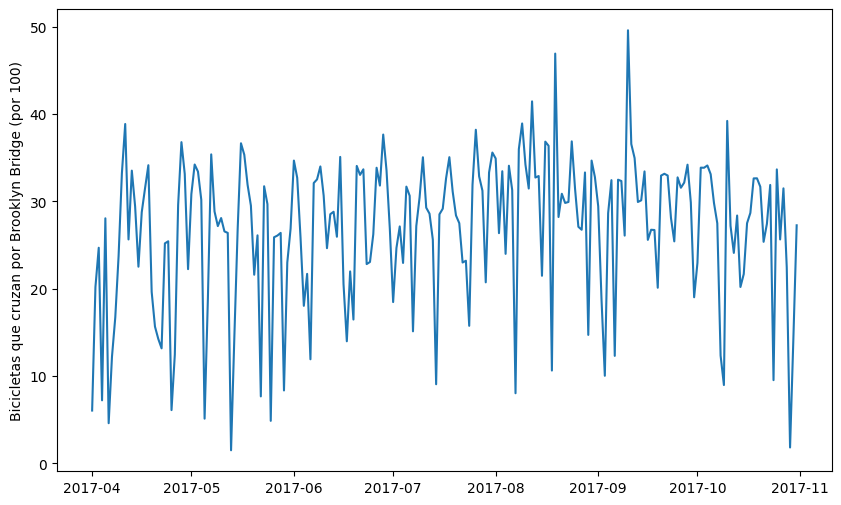

In [18]:
plt.figure(figsize=(10,6))
plt.plot(df['Brooklyn Bridge'],label='Observaciones diarias')
plt.ylabel('Bicicletas que cruzan por Brooklyn Bridge (por 100)')
plt.show()

In [ ]:
λ = df['Brooklyn Bridge'].mean()
λ

26.800420560747664

#### Distribución de probabilidad **a priori** de  $\lambda$ 


[Distribución Gamma](https://en.wikipedia.org/wiki/Gamma_distribution)

 $E(\lambda)  = k ~\theta$

 $varianza = k ~ \theta^2$



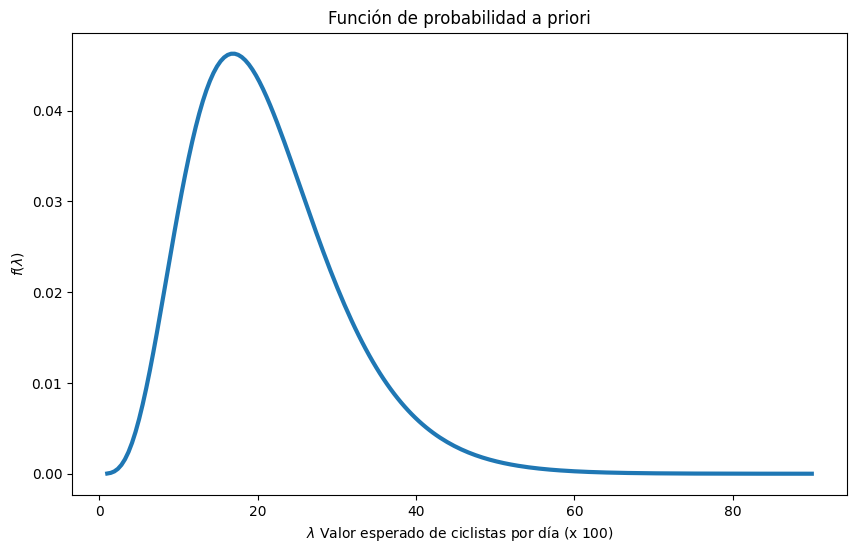

In [19]:
# Parametros conocidos (a priori)
k, theta = 5, 4.22

xs = np.linspace(1,90,200)
prior_pdf = gamma.pdf(xs, k, scale=theta)

plt.figure(figsize=(10,6))
plt.plot(xs,prior_pdf,linewidth=3)

plt.xlabel('$\lambda$ Valor esperado de ciclistas por día (x 100)')
plt.ylabel('$f(\lambda)$')
plt.title('Función de probabilidad a priori')
plt.show()

#### Nuevos datos


In [20]:
may = df.loc['2017-05-01':'2017-05-31']

<Axes: xlabel='Date'>

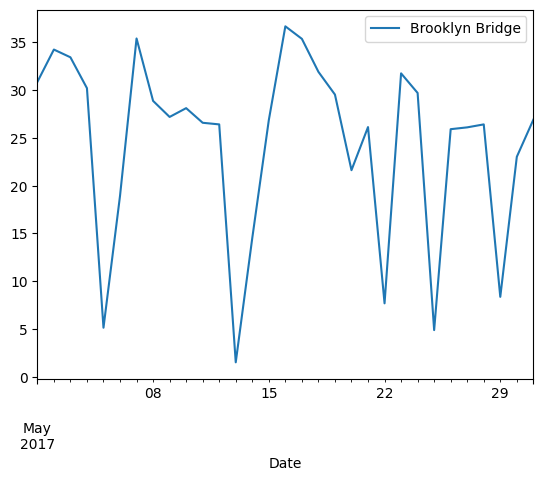

In [21]:
may.plot()

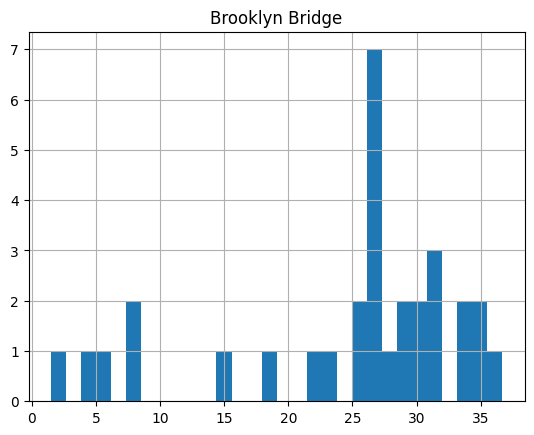

In [22]:
may.hist(bins=30)
plt.show()

In [23]:
may.mean()

Brooklyn Bridge    24.513226
dtype: float64

#### Parametros posteriores

In [24]:
def k_theta_post(nuevos_datos, prior_k, prior_theta):
    
    post_k = prior_k + np.sum(nuevos_datos)
    post_theta = prior_theta/(nuevos_datos.shape[0] * prior_theta + 1.0)
       
    return post_k, post_theta

In [25]:
may_k, may_theta = k_theta_post(may.values, k, theta)

In [26]:
may_k, may_theta

(764.91, 0.03201335153997876)

In [27]:
λ_may = may_k * may_theta
λ_may

24.48733272644515

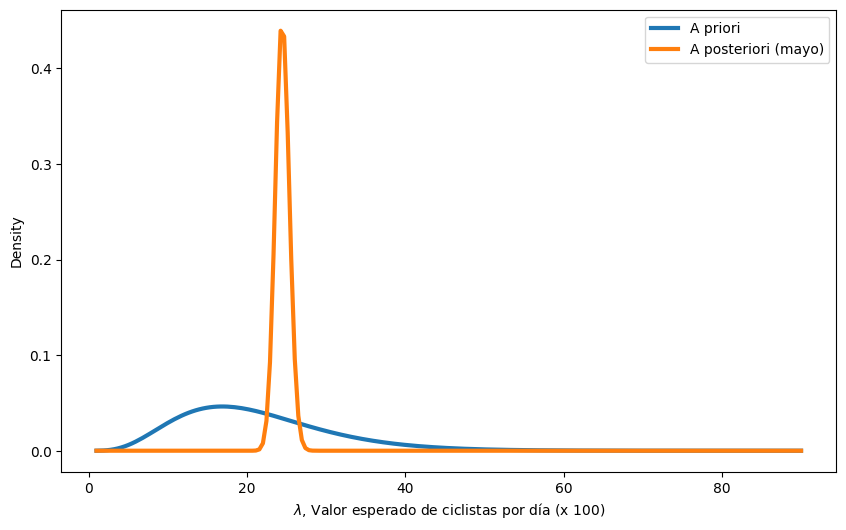

In [28]:
may_post = gamma.pdf(xs, may_k, scale=may_theta)

 
plt.figure(figsize=(10,6))
plt.plot(xs, prior_pdf, linewidth=3, label='A priori')
plt.plot(xs, may_post,  linewidth=3, label='A posteriori (mayo)')

plt.xlabel('$\lambda$, Valor esperado de ciclistas por día (x 100)')
plt.ylabel('Density')
plt.legend()
plt.show()


In [30]:
df.columns

Index(['High Temp (°F)', 'Low Temp (°F)', 'Precipitation', 'Brooklyn Bridge',
       'Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge',
       'Total'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 2017-04-01 to 2017-10-31
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   High Temp (°F)       214 non-null    float64
 1   Low Temp (°F)        214 non-null    float64
 2   Precipitation        214 non-null    object 
 3   Brooklyn Bridge      214 non-null    float64
 4   Manhattan Bridge     214 non-null    float64
 5   Williamsburg Bridge  214 non-null    float64
 6   Queensboro Bridge    214 non-null    float64
 7   Total                214 non-null    float64
dtypes: float64(7), object(1)
memory usage: 15.0+ KB


<Axes: xlabel='Date'>

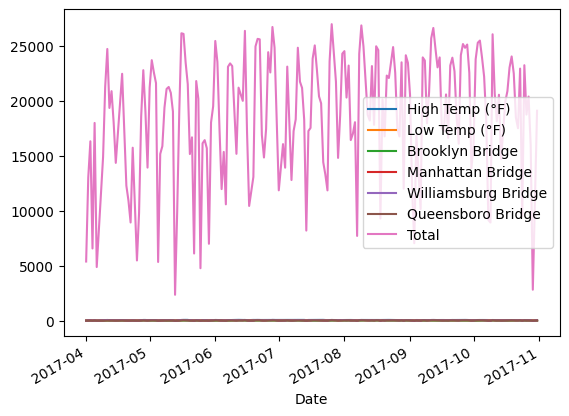

In [40]:
df[df['Precipitation'] !='T'].plot()

In [45]:
df.loc[df['Precipitation'] !='T','Precipitation'].astype(float).describe()

count    200.000000
mean       0.141000
std        0.406242
min        0.000000
25%        0.000000
50%        0.000000
75%        0.060000
max        3.030000
Name: Precipitation, dtype: float64

In [46]:
lluvia = df[df['Precipitation'] !='T']

In [51]:
lluvia['Precipitation'] = lluvia['Precipitation'].astype(float)

<ipython-input-51-833d06b5fc8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lluvia['Precipitation'] = lluvia['Precipitation'].astype(float)


<Axes: >

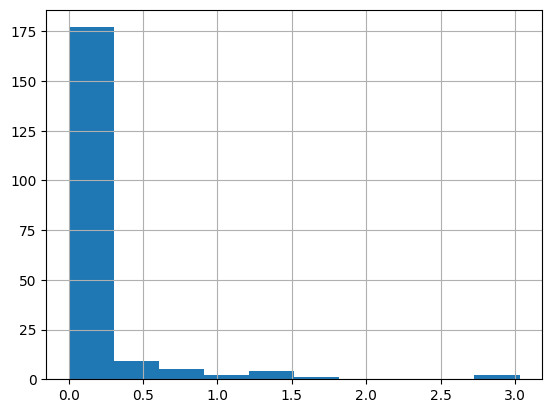

In [52]:
lluvia['Precipitation'].hist()

In [58]:
datos_lluvia = lluvia.loc[lluvia['Precipitation']>0.8, 'Brooklyn Bridge']

In [61]:
new_k, new_theta = k_theta_post(datos_lluvia.values, may_k, may_theta)

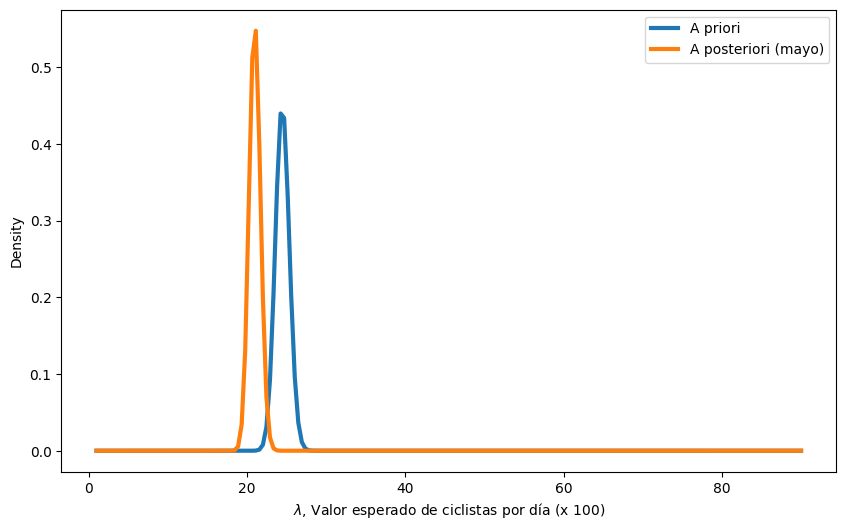

In [62]:
new_post = gamma.pdf(xs, new_k, scale=new_theta)

 
plt.figure(figsize=(10,6))
plt.plot(xs, may_post, linewidth=3, label='A priori')
plt.plot(xs, new_post,  linewidth=3, label='A posteriori (mayo)')

plt.xlabel('$\lambda$, Valor esperado de ciclistas por día (x 100)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Para profundizar

* Calcular la distribución de probablidad del promedio diario de ciclistas en fin de semana


# Referencias
[1]F. Muñoz, «Distribuciones Poisson y Gamma: Una Discreta y Continua Relación.», prospect, vol. 12, n.º 1, p. 99, ago. 2014, doi: 10.15665/rp.v12i1.156.

[2]dartmouth-math76/conjugate-inference-solution. Dartmouth Math76 (Summer 2020), 2020. Accedido: 6 de agosto de 2021. [En línea]. Disponible en: https://github.com/dartmouth-math76/conjugate-inference-solution/blob/f98e6c7d477a05016d913d4669227c35cd65905b/conjugate-inference-solution.ipynb

[3]«Conjugate prior», Wikipedia. 27 de julio de 2021. Accedido: 6 de agosto de 2021. [En línea]. Disponible en: https://en.wikipedia.org/w/index.php?title=Conjugate_prior&oldid=1035720106
